## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle 
import warnings
warnings.filterwarnings("ignore")

## Carregamento de Dados

In [2]:
df = pd.read_csv("marketing_campaign.csv", delimiter = "\t")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Análise Exploratória e Limpeza

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

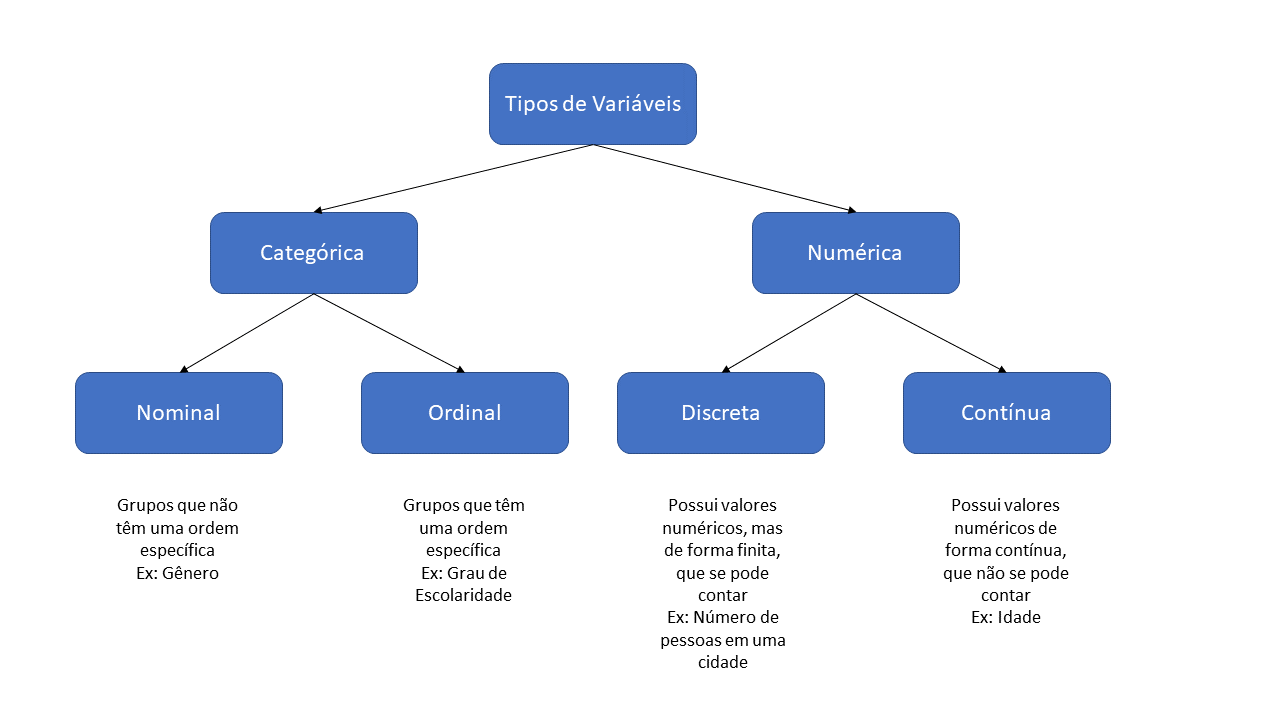

In [5]:
Image(filename = "Tipos+de+Variáveis.png", width = 1000, height = 1000)

In [6]:
def show_null(df):
    null_columns = (df.isnull().sum(axis = 0)/len(df)).sort_values(ascending = False).index
    
    null_data = pd.concat([df.isnull().sum(axis = 0), 
                           (df.isnull().sum(axis = 0)/len(df)).sort_values(ascending = False), 
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                          axis = 1)
    
    null_data = null_data.rename(columns = {0: "#",
                                            1: "% null",
                                            2: "type"}).sort_values(ascending = False, 
                                                                    by = "% null")
    
    return null_data

In [7]:
def plot_num(df, feature):
    fig = plt.figure(figsize = (12 ,8))
    gs = GridSpec(1, 2)
    sns.boxplot(y = feature, data = df, color = "aqua", ax = fig.add_subplot(gs[0, 0]))
    plt.ylabel(feature)
    sns.stripplot(y = df [feature], color = "maroon", ax = fig.add_subplot(gs[0, 1])) 
    plt.ylabel(None)
    plt.show()

In [8]:
def plot_cat(df, feature):
    fig = plt.figure(figsize = (12 ,8))
    ax = sns.countplot(data = df, x = feature)
    for p in ax.patches:
    
        ax.annotate(f'\n{p.get_height()}',
                   (p.get_x()+0.4, p.get_height()+5), 
                   ha = "center",
                   color = "black")
    plt.xlabel("\n" + feature)
    plt.ylabel("Quantidade de Clientes")
    plt.show()

#### People

In [9]:
people = df[["ID", "Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", 
             "Dt_Customer", "Recency", "Complain"]]

In [10]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [11]:
show_null(people)

,#,% null,type
Income,24,0.010714,float64
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,object
Recency,0,0.000000,int64
Complain,0,0.000000,int64


#### Income

In [12]:
people.dropna(inplace = True)

In [13]:
show_null(people)

,#,% null,type
ID,0,0.0,int64
Year_Birth,0,0.0,int64
Education,0,0.0,object
Marital_Status,0,0.0,object
Income,0,0.0,float64
Kidhome,0,0.0,int64
Teenhome,0,0.0,int64
Dt_Customer,0,0.0,object
Recency,0,0.0,int64
Complain,0,0.0,int64


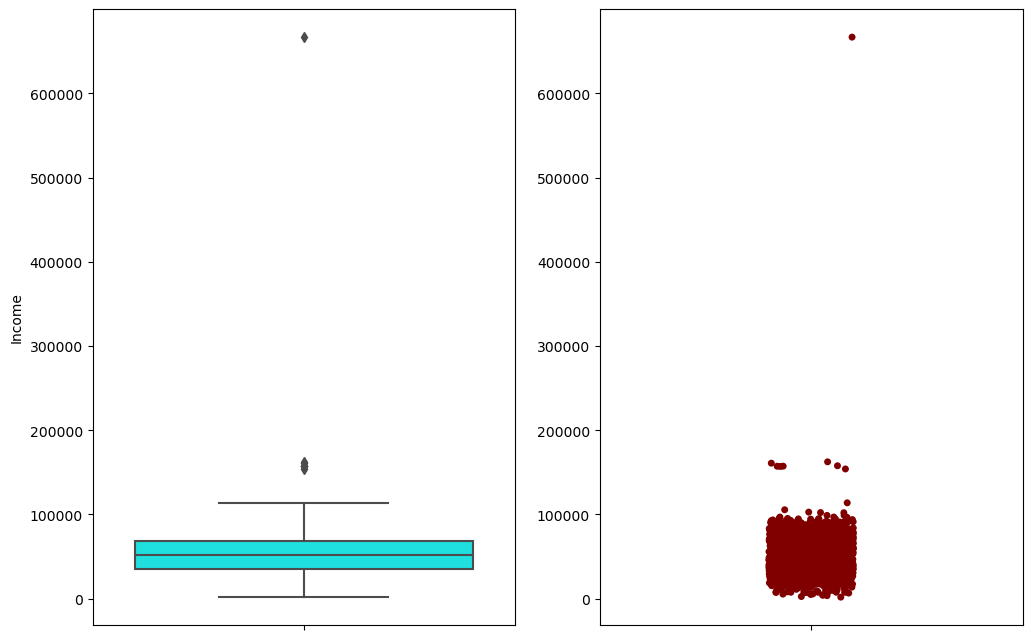

In [14]:
plot_num(people, "Income")

In [15]:
people = people[people.Income < 200000]

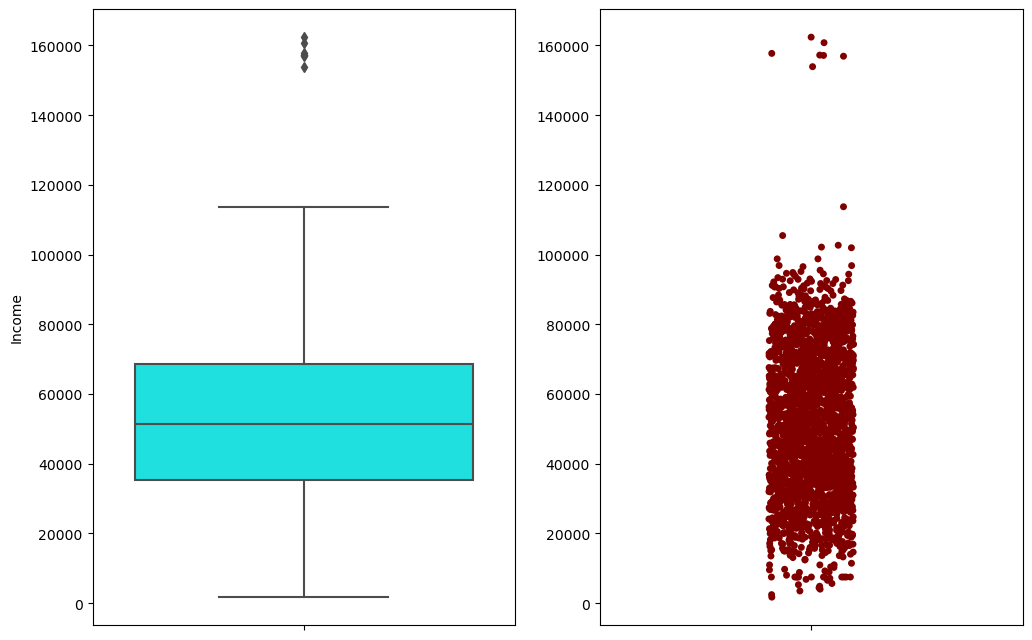

In [16]:
plot_num(people, "Income")

#### Year_Birth

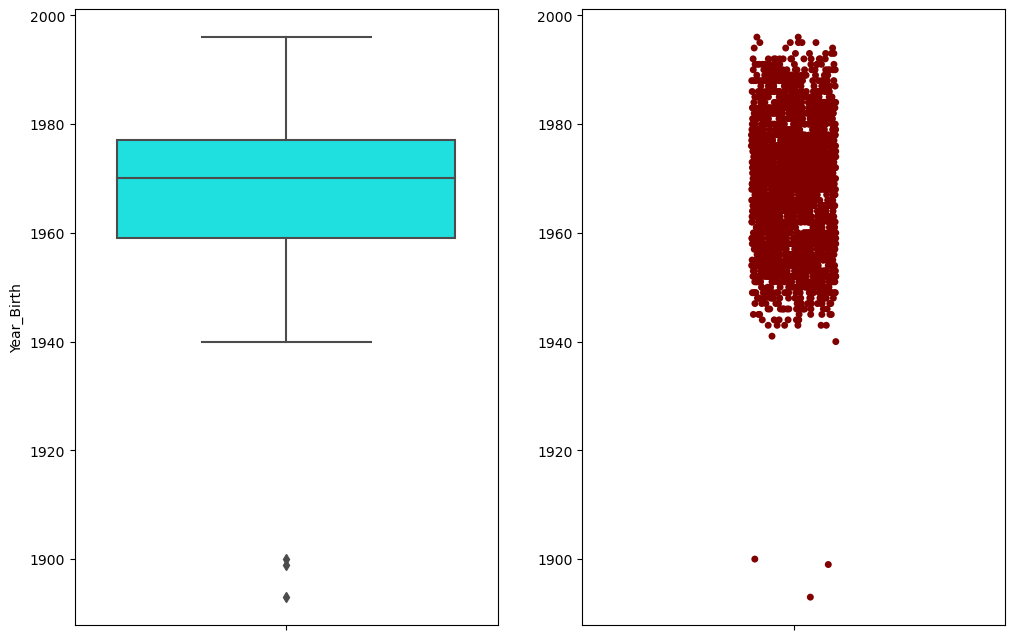

In [17]:
plot_num(people, "Year_Birth")

In [18]:
people = people[people.Year_Birth > 1930]

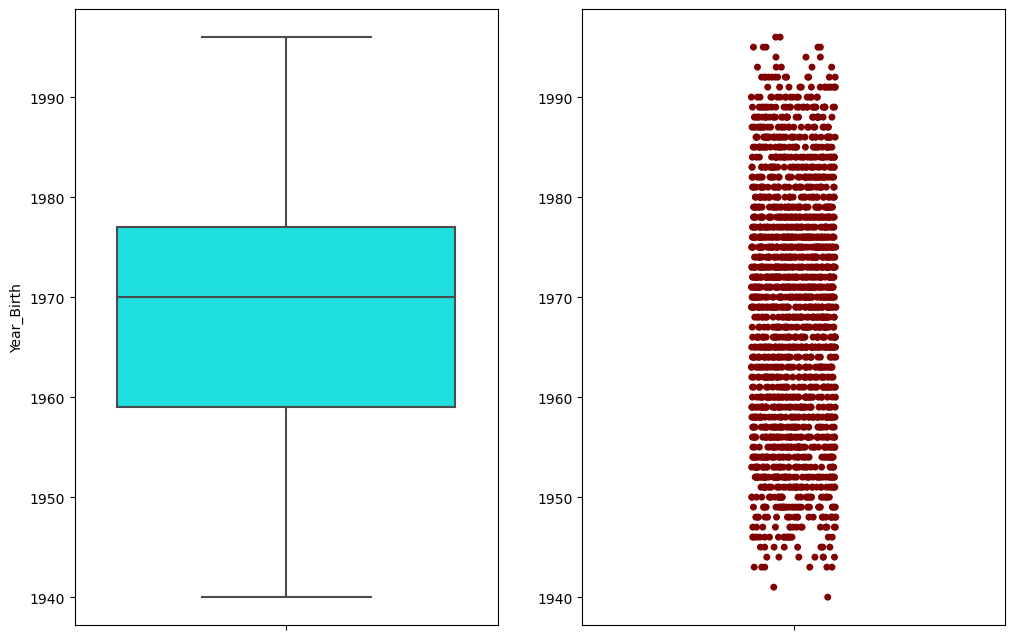

In [19]:
plot_num(people, "Year_Birth")

#### Education

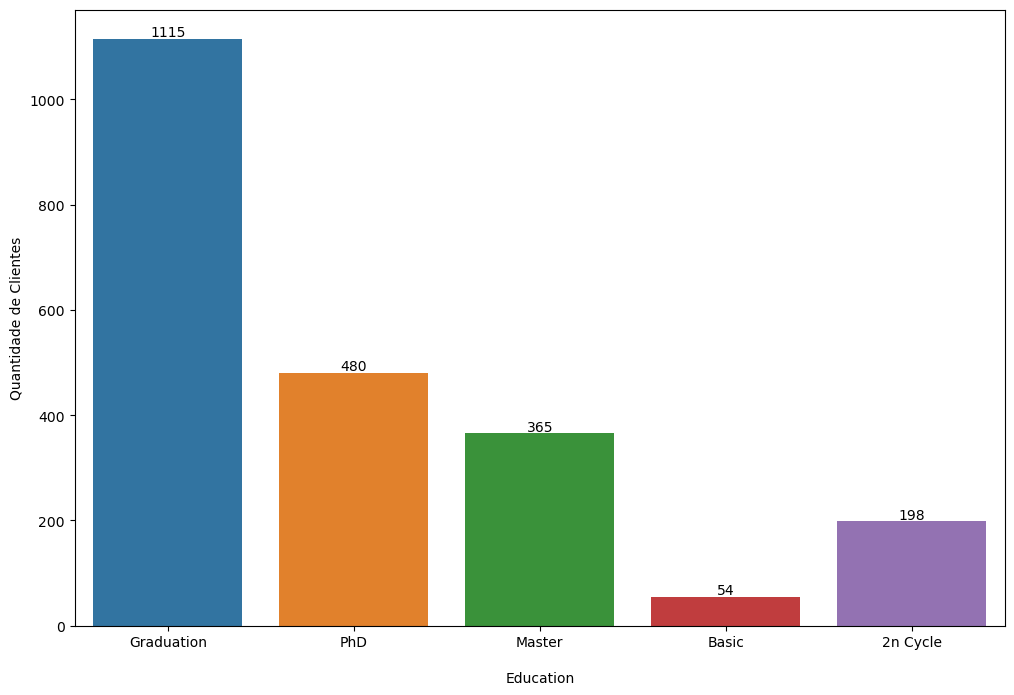

In [20]:
plot_cat(people, "Education")

In [21]:
people.Education = people.Education.apply(lambda x: 0 if x == "Basic" else(1 if x == "2n Cycle"
                                                        else (2 if x == "Graduation"
                                                              else (3 if x == "Master"
                                                                    else (4 if x == "PhD" else None)))))

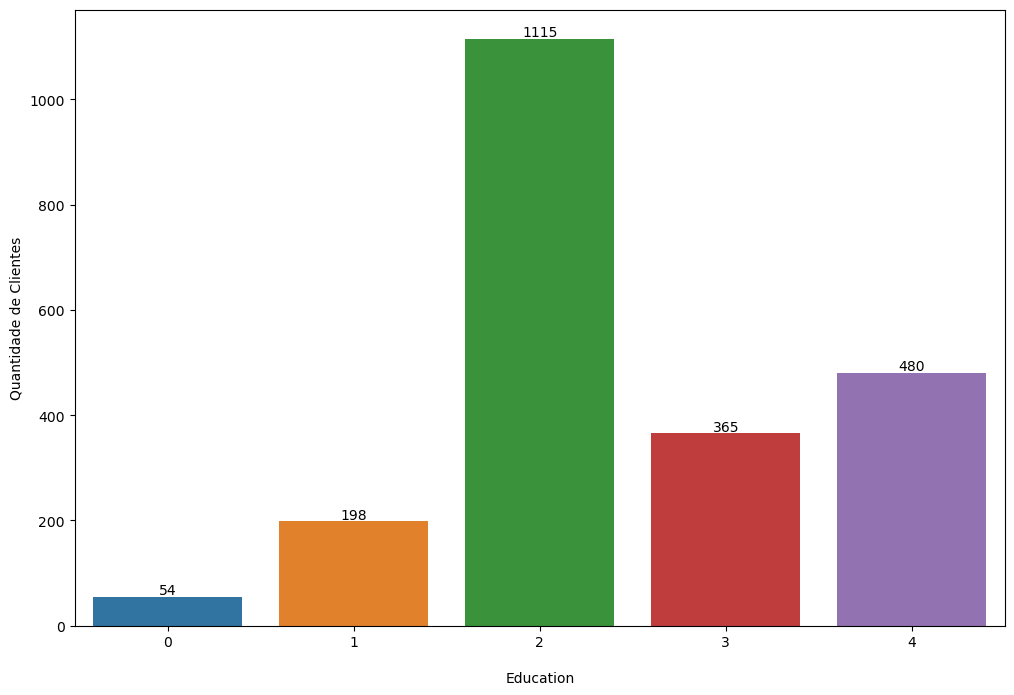

In [22]:
plot_cat(people, "Education")

#### Marital_Status

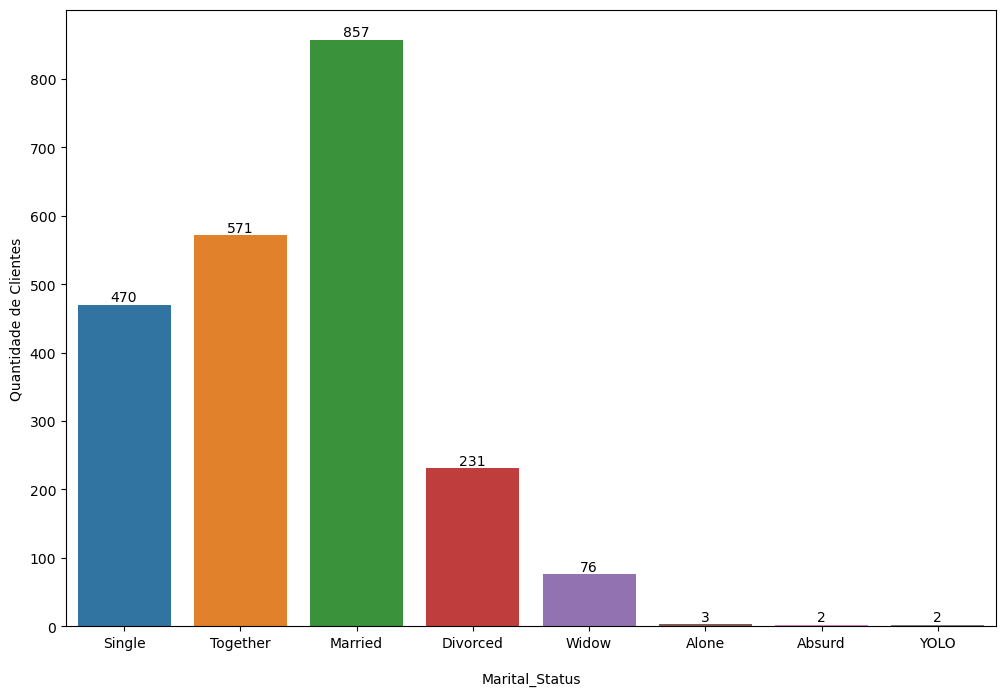

In [23]:
plot_cat(people, "Marital_Status")

In [24]:
people = people[people.Marital_Status != "Absurd"]

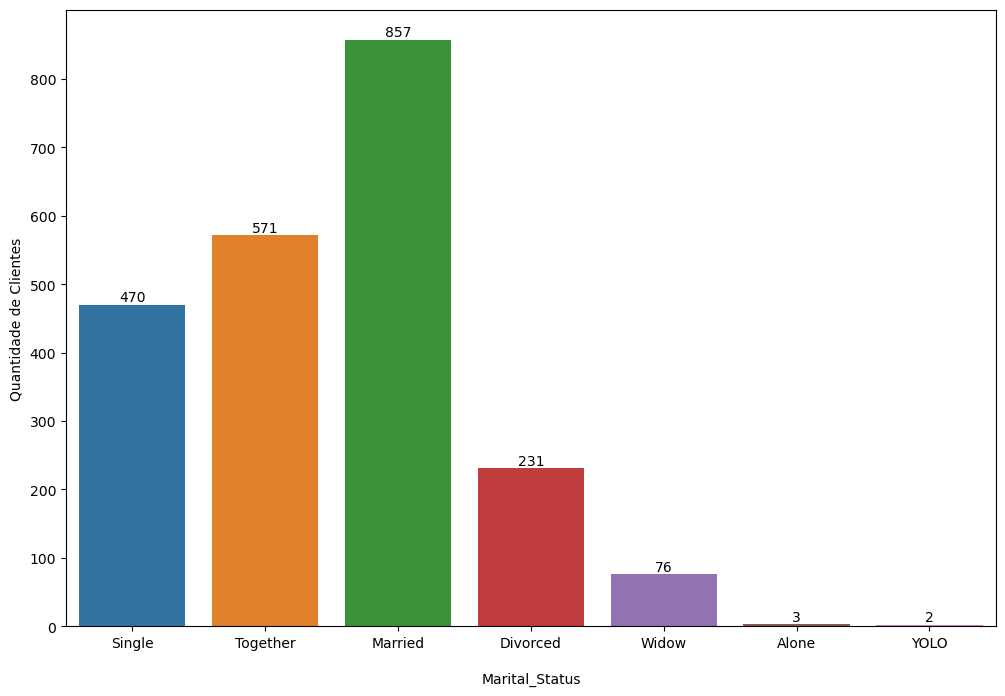

In [25]:
plot_cat(people, "Marital_Status")

In [26]:
people.Marital_Status = people.Marital_Status.apply(lambda x: "Single" if x == "Alone" 
                           else ("Single" if x == "YOLO" else x))

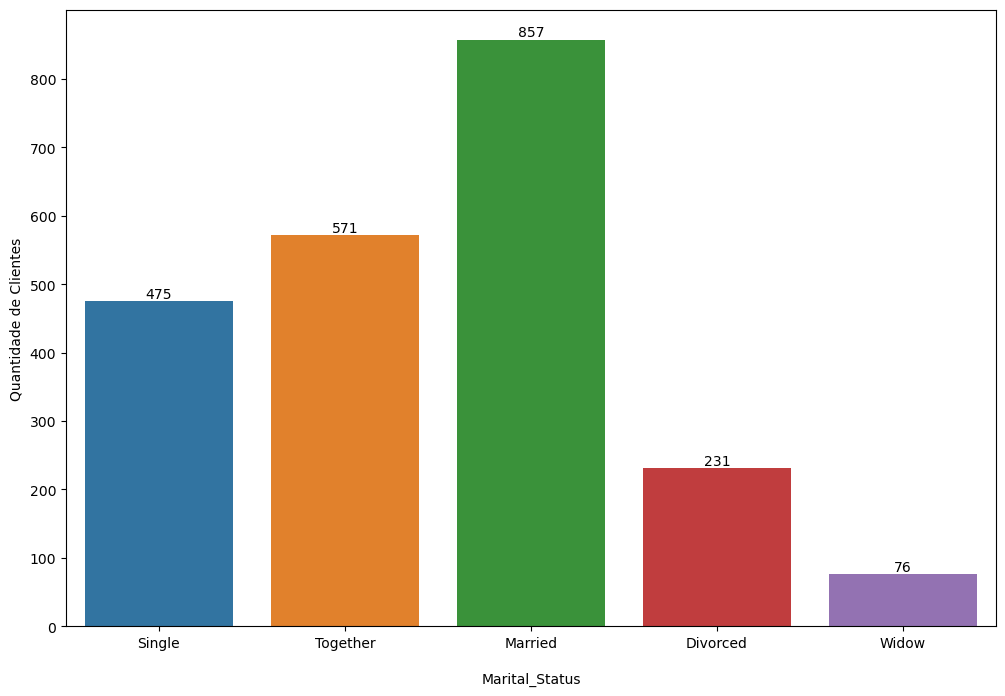

In [27]:
plot_cat(people, "Marital_Status")

In [28]:
people.Marital_Status = people.Marital_Status.apply(lambda x: "Together" if x == "Married" else x)

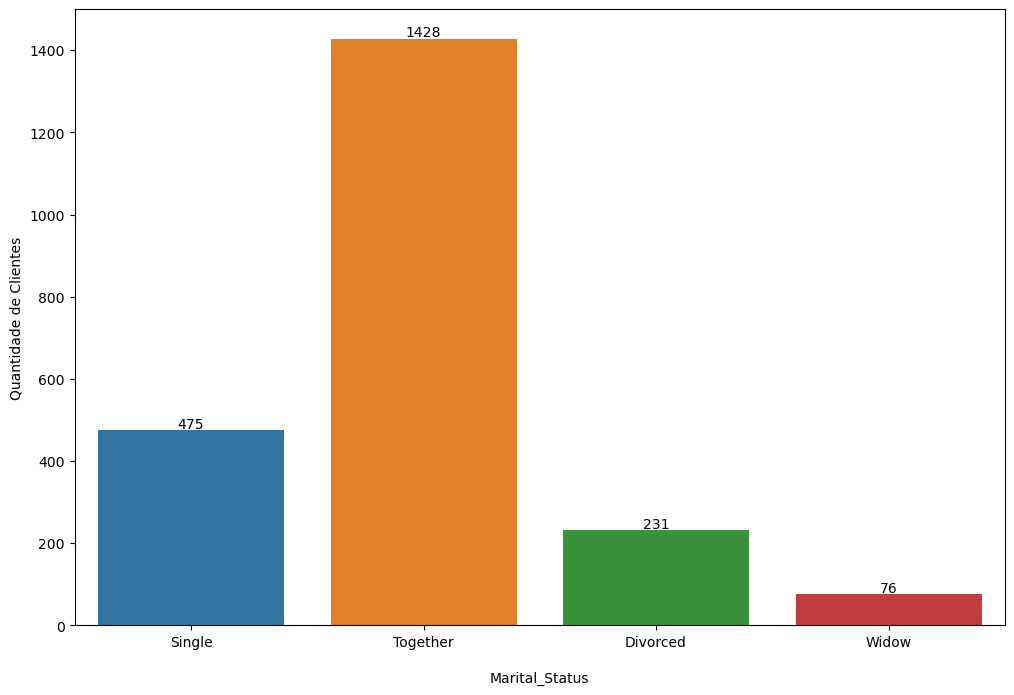

In [29]:
plot_cat(people, "Marital_Status")

In [30]:
people.dtypes

ID                  int64
Year_Birth          int64
Education           int64
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
Complain            int64
dtype: object

In [31]:
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True)

In [32]:
people.dtypes

ID                         int64
Year_Birth                 int64
Education                  int64
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer       datetime64[ns]
Recency                    int64
Complain                   int64
dtype: object

In [33]:
people = pd.get_dummies(people)

In [34]:
people

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2,58138.0,0,0,2012-09-04,58,0,0,1,0,0
1,2174,1954,2,46344.0,1,1,2014-03-08,38,0,0,1,0,0
2,4141,1965,2,71613.0,0,0,2013-08-21,26,0,0,0,1,0
3,6182,1984,2,26646.0,1,0,2014-02-10,26,0,0,0,1,0
4,5324,1981,4,58293.0,1,0,2014-01-19,94,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,2013-06-13,46,0,0,0,1,0
2236,4001,1946,4,64014.0,2,1,2014-06-10,56,0,0,0,1,0
2237,7270,1981,2,56981.0,0,0,2014-01-25,91,0,1,0,0,0
2238,8235,1956,3,69245.0,0,1,2014-01-24,8,0,0,0,1,0


#### Kidhome

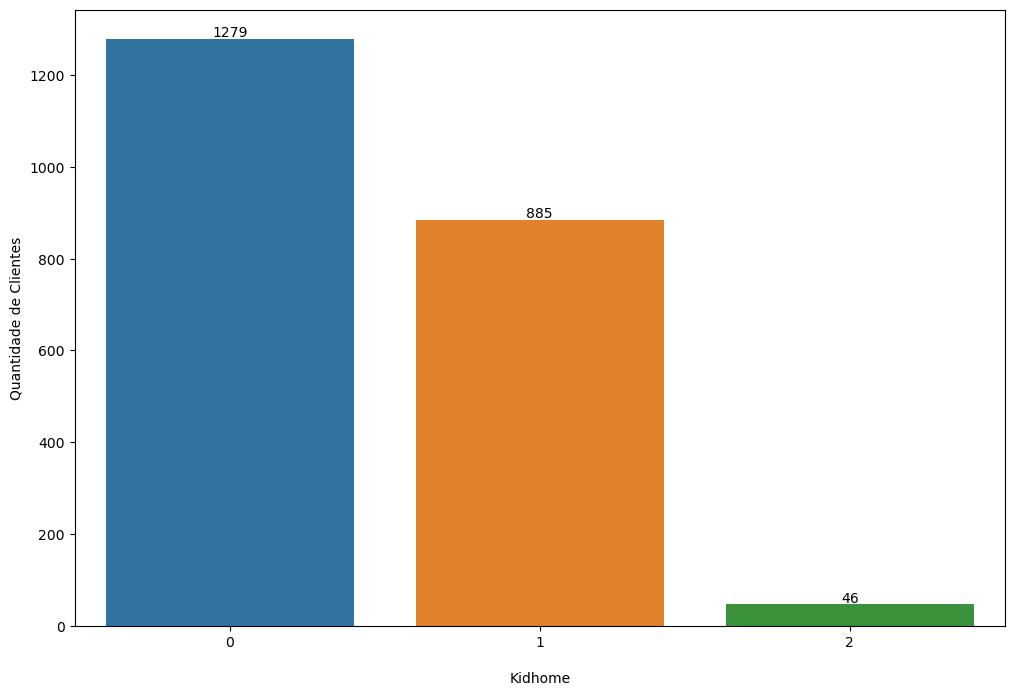

In [35]:
plot_cat(people, "Kidhome")

#### Teenhome

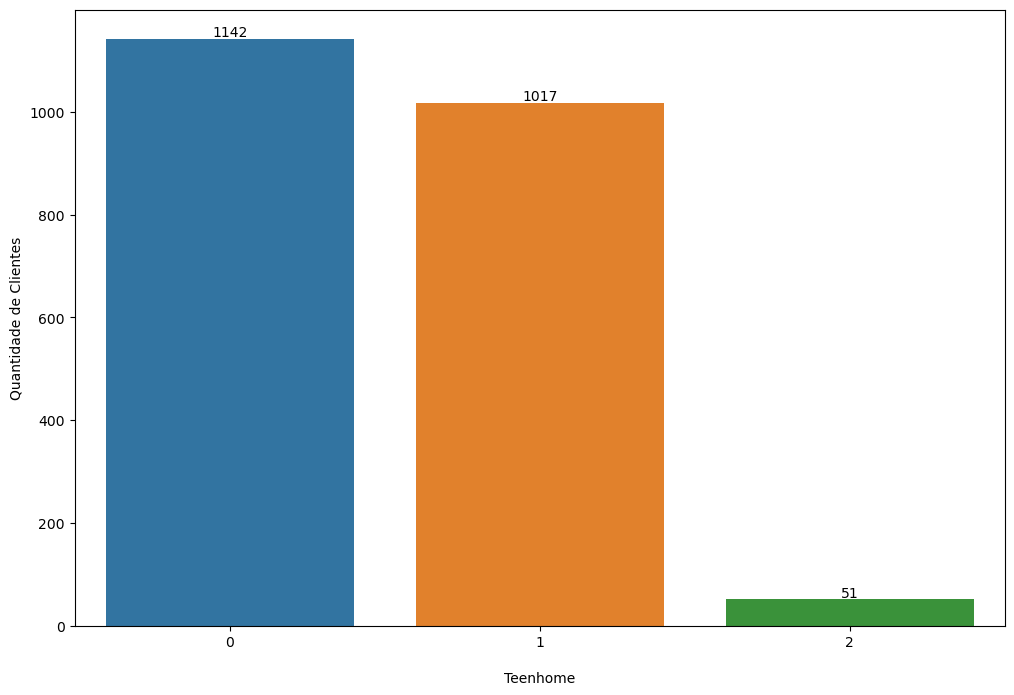

In [36]:
plot_cat(people, "Teenhome")

#### Childrenhome

In [37]:
people ["Childrenhome"] = people.Kidhome + people.Teenhome

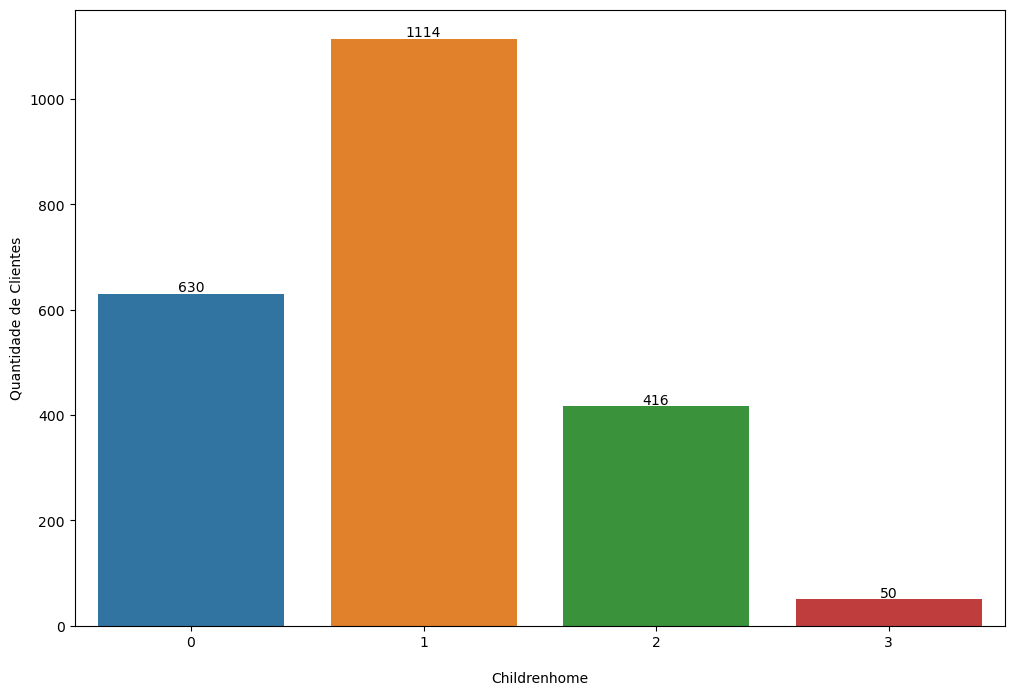

In [38]:
plot_cat(people, "Childrenhome")

In [39]:
people.drop(columns = ["Kidhome", "Teenhome"], inplace = True)

In [40]:
people.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome
0,5524,1957,2,58138.0,2012-09-04,58,0,0,1,0,0,0
1,2174,1954,2,46344.0,2014-03-08,38,0,0,1,0,0,2
2,4141,1965,2,71613.0,2013-08-21,26,0,0,0,1,0,0
3,6182,1984,2,26646.0,2014-02-10,26,0,0,0,1,0,1
4,5324,1981,4,58293.0,2014-01-19,94,0,0,0,1,0,1


#### Dt_Customer

In [41]:
people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [42]:
people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [43]:
(people["Dt_Customer"] + pd.to_timedelta(people["Recency"], unit = "d")).max()

Timestamp('2014-10-04 00:00:00')

In [44]:
people["LifeTime"] = (pd.to_datetime("2014-10-04") - people["Dt_Customer"]).dt.days/30

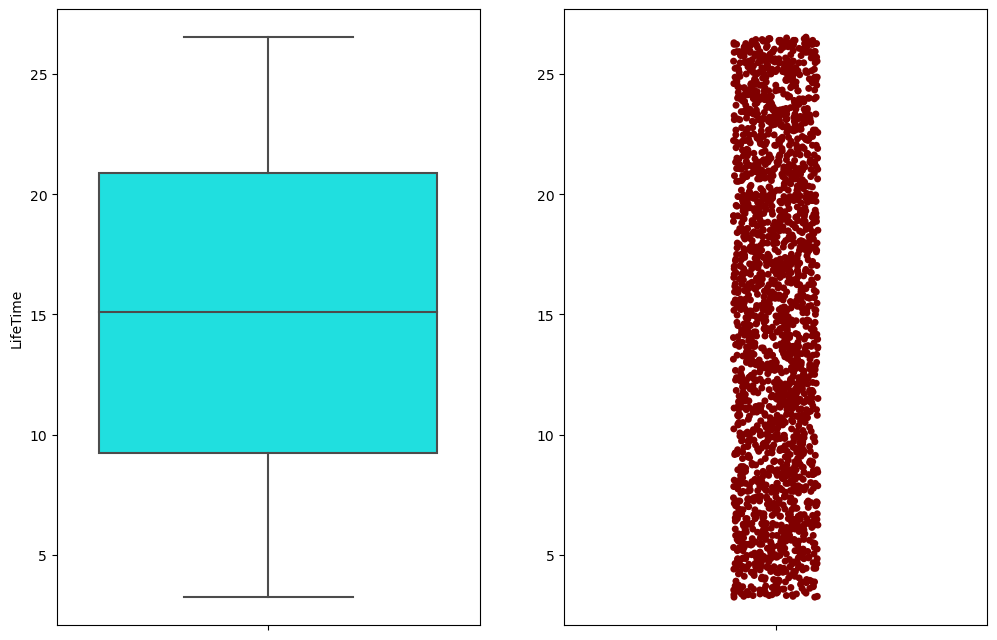

In [45]:
plot_num(people, "LifeTime")

#### Recency

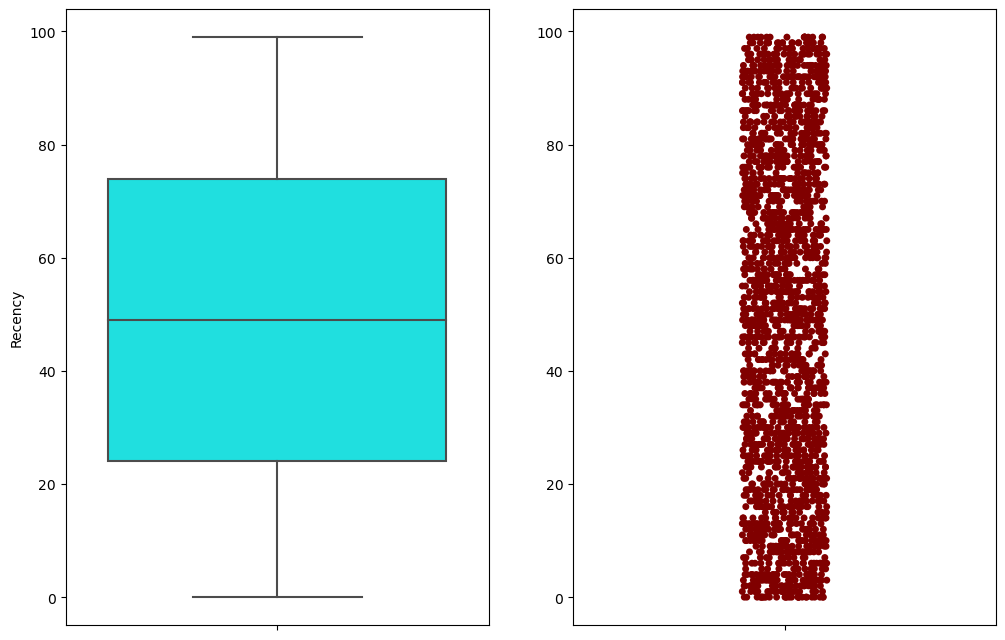

In [46]:
plot_num(people, "Recency")

#### Complain

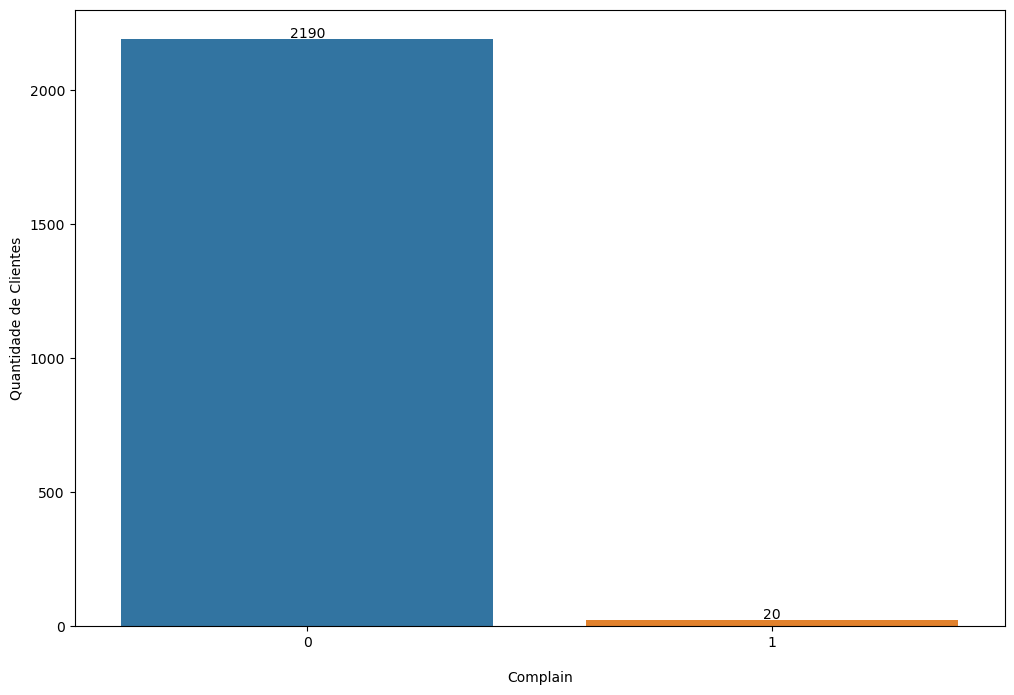

In [47]:
plot_cat(people, "Complain")

In [48]:
people.drop(columns = ["Complain"], inplace = True)

In [49]:
people.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime
0,5524,1957,2,58138.0,2012-09-04,58,0,1,0,0,0,25.333333
1,2174,1954,2,46344.0,2014-03-08,38,0,1,0,0,2,7.000000
2,4141,1965,2,71613.0,2013-08-21,26,0,0,1,0,0,13.633333
3,6182,1984,2,26646.0,2014-02-10,26,0,0,1,0,1,7.866667
4,5324,1981,4,58293.0,2014-01-19,94,0,0,1,0,1,8.600000


In [50]:
people.drop(columns = ["Dt_Customer"], inplace = True)

In [51]:
people.head()

,ID,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime
0,5524,1957,2,58138.0,58,0,1,0,0,0,25.333333
1,2174,1954,2,46344.0,38,0,1,0,0,2,7.000000
2,4141,1965,2,71613.0,26,0,0,1,0,0,13.633333
3,6182,1984,2,26646.0,26,0,0,1,0,1,7.866667
4,5324,1981,4,58293.0,94,0,0,1,0,1,8.600000


In [52]:
people.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Childrenhome',
       'LifeTime'],
      dtype='object')

#### Products

In [53]:
products = df[["ID", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
               "MntGoldProds"]]

In [54]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [55]:
show_null(products)

,#,% null,type
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


#### MntWines

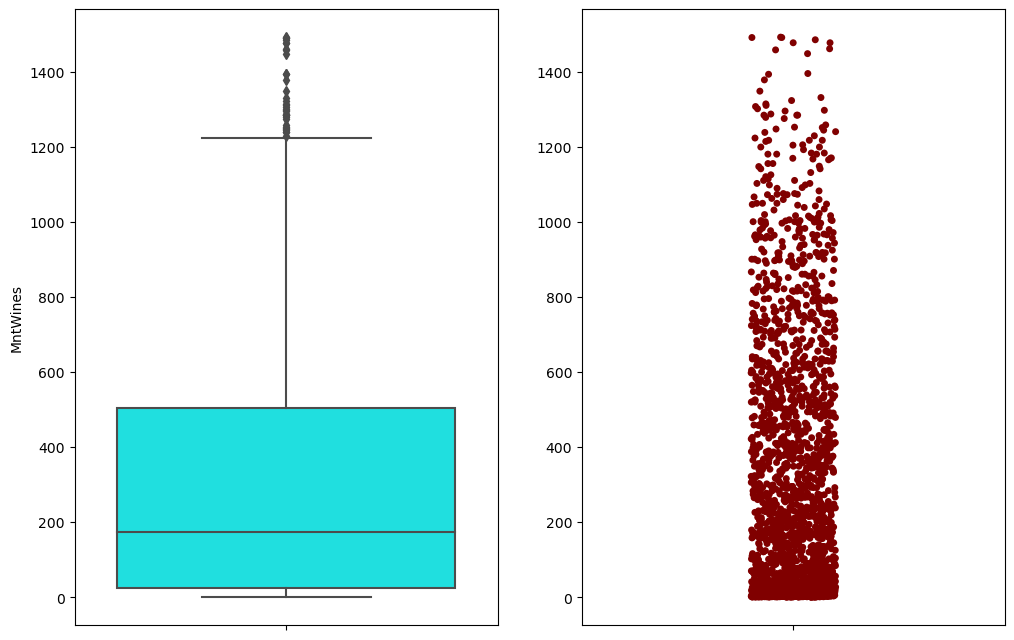

In [56]:
plot_num(products, "MntWines")

#### MntFruits

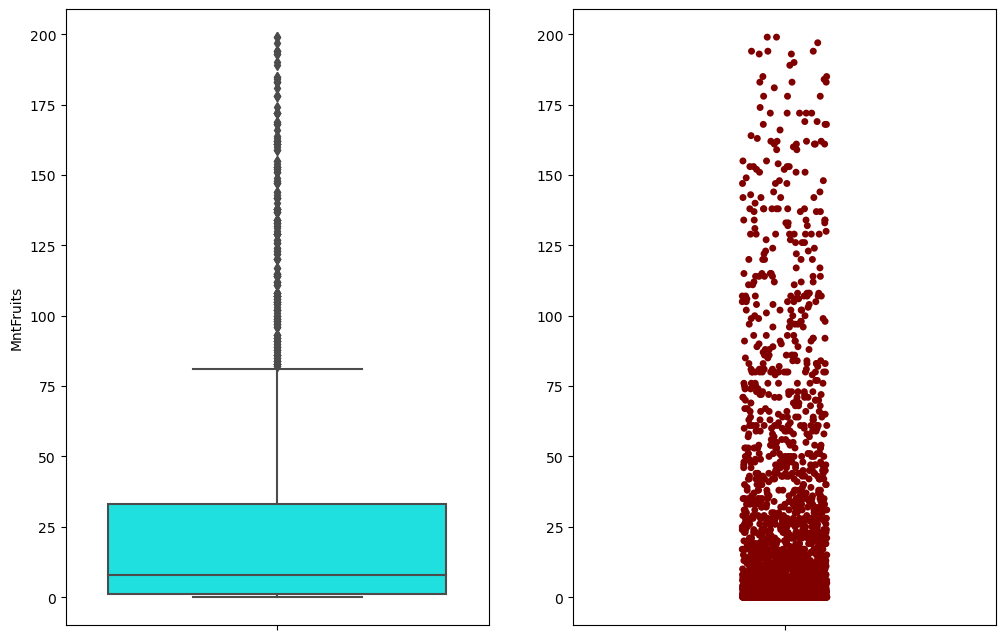

In [57]:
plot_num(products, "MntFruits")

#### MntMeatProducts

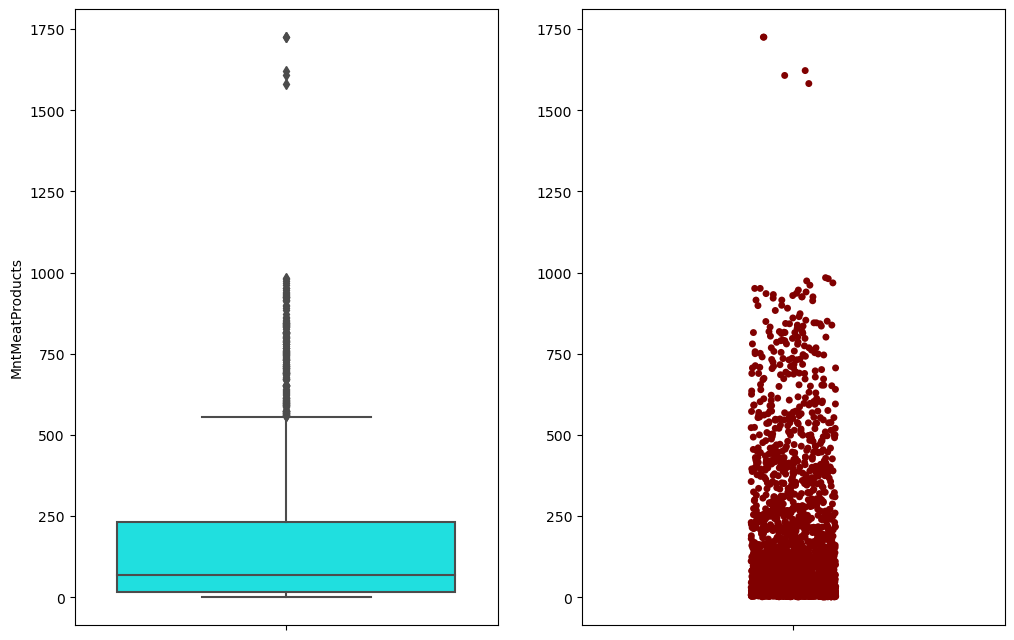

In [58]:
plot_num(products, "MntMeatProducts")

#### MntFishProducts

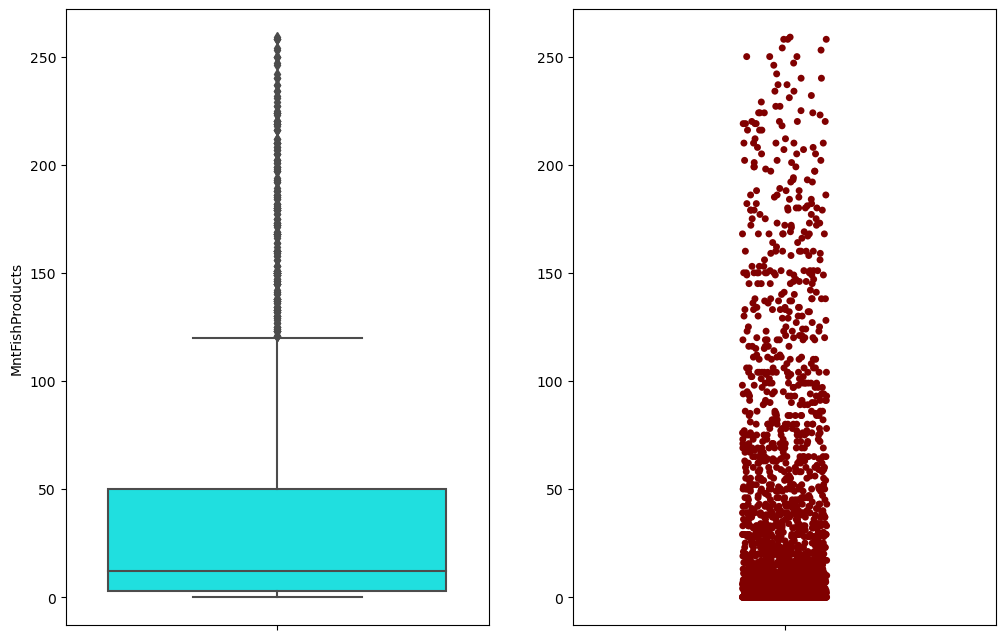

In [59]:
plot_num(products, "MntFishProducts")

#### MntSweetProducts

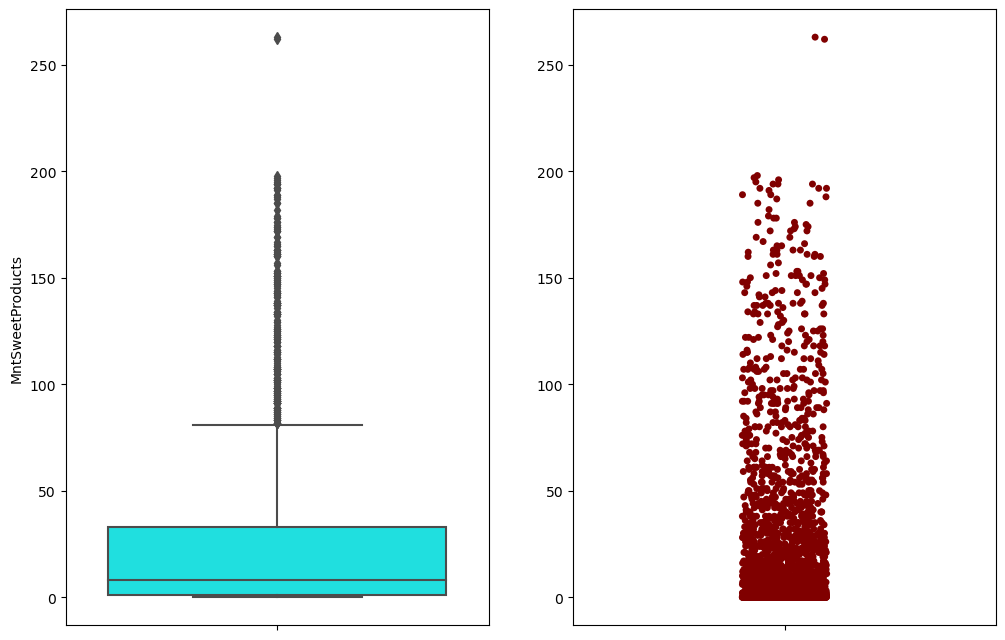

In [60]:
plot_num(products, "MntSweetProducts")

#### MntGoldProds

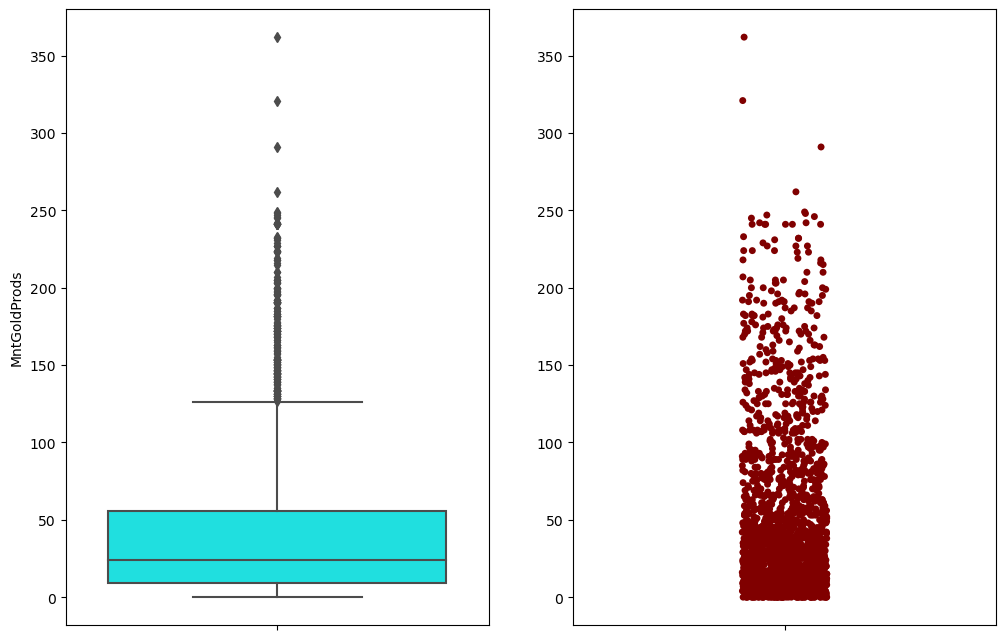

In [61]:
plot_num(products, "MntGoldProds")

In [62]:
products["TotalAmountSpent"] = products.MntWines + products.MntFruits + products.MntMeatProducts \
+ products.MntFishProducts + products.MntSweetProducts + products.MntGoldProds

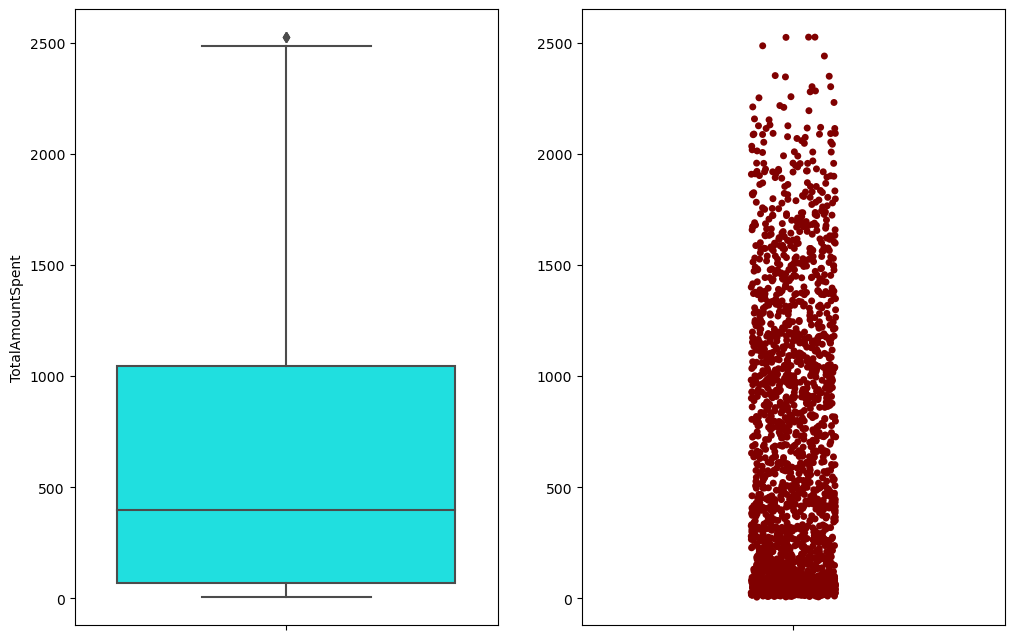

In [63]:
plot_num(products, "TotalAmountSpent")

In [64]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214
std,3246.662198,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000
50%,5458.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,8427.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000
max,11191.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


In [65]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
0,5524,635,88,546,172,88,88,1617
1,2174,11,1,6,2,1,6,27
2,4141,426,49,127,111,21,42,776
3,6182,11,4,20,10,3,5,53
4,5324,173,43,118,46,27,15,422


#### Promotion

In [66]:
promotion = df[["ID", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
               "Response"]]

In [67]:
promotion.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0


In [68]:
show_null(promotion)

,#,% null,type
ID,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
Response,0,0.0,int64


In [69]:
promotion.describe()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,3246.662198,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
promotion["AcceptedCmp"] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 \
+ promotion.AcceptedCmp4 + promotion.AcceptedCmp5 + promotion.Response

In [71]:
promotion["AcceptedCmp"].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmp, dtype: float64

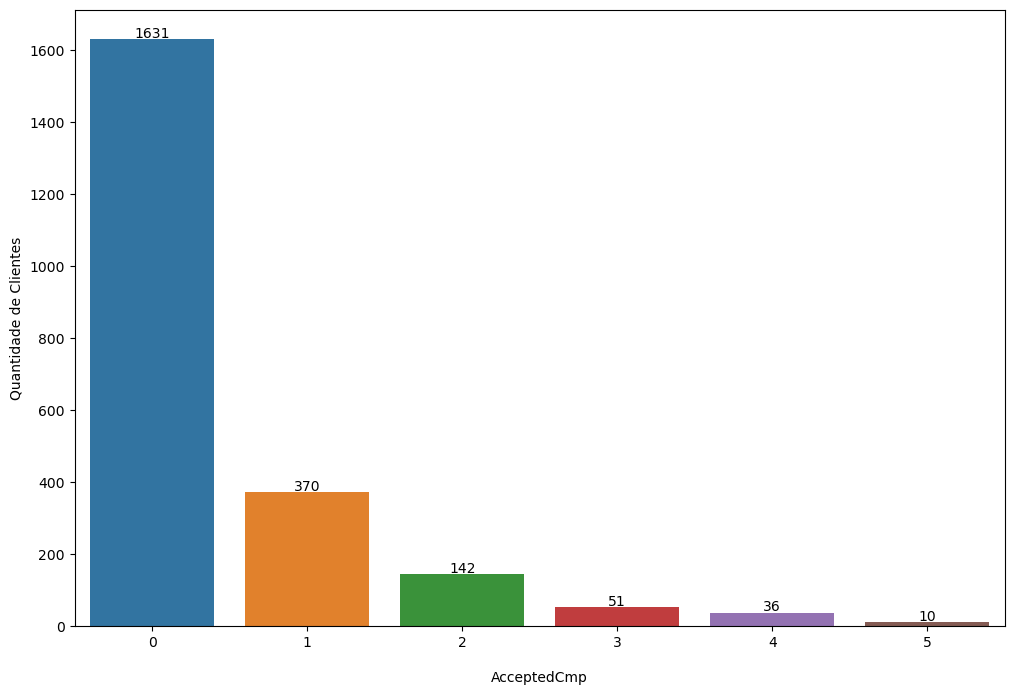

In [72]:
plot_cat(promotion, "AcceptedCmp")

In [73]:
promotion = promotion[["ID", "AcceptedCmp"]]

In [74]:
promotion.head()

,ID,AcceptedCmp
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0


#### Place

In [75]:
place = df[["ID", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases",
                "NumWebVisitsMonth"]]

In [76]:
place.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
0,5524,8,10,4,3,7
1,2174,1,1,2,2,5
2,4141,8,2,10,1,4
3,6182,2,0,4,2,6
4,5324,5,3,6,5,5


In [77]:
show_null(place)

,#,% null,type
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


In [78]:
place["TotalPurchases"] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases

In [79]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.662054,5.790179,2.325000,5.316518,12.537054
std,3246.662198,2.778714,2.923101,3.250958,1.932238,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000
50%,5458.500000,4.000000,2.000000,5.000000,2.000000,6.000000,12.000000
75%,8427.750000,6.000000,4.000000,8.000000,3.000000,7.000000,18.000000
max,11191.000000,27.000000,28.000000,13.000000,15.000000,20.000000,32.000000


In [80]:
place[place.TotalPurchases == 0]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,0,0,0,15,20,0
1524,11110,0,0,0,0,14,0
1846,9931,0,0,0,15,19,0
2132,11181,0,0,0,0,0,0


In [81]:
place = place[place["TotalPurchases"] > 0]

In [82]:
place['NumWebPurchases'] = place['NumWebPurchases']/place['TotalPurchases'] 
place['NumCatalogPurchases'] = place['NumCatalogPurchases']/place['TotalPurchases'] 
place['NumStorePurchases'] = place['NumStorePurchases']/place['TotalPurchases'] 
place['NumDealsPurchases'] = place['NumDealsPurchases']/place['TotalPurchases']

In [83]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.329874,0.164809,0.505317,0.247963,5.300806,12.570725
std,3245.168172,0.121858,0.140668,0.149485,0.356679,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.250000,0.000000,0.401852,0.083333,3.000000,6.000000
50%,5453.500000,0.333333,0.150000,0.500000,0.200000,6.000000,12.000000
75%,8419.500000,0.400000,0.250000,0.600000,0.333333,7.000000,18.000000
max,11191.000000,1.000000,1.000000,1.000000,15.000000,20.000000,32.000000


In [84]:
place[place.NumDealsPurchases > 1]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
1042,10749,0.0,1.0,0.0,15.0,19,1


In [85]:
place = place[place["NumDealsPurchases"] <= 1]

#### NumWebVisitsMonth

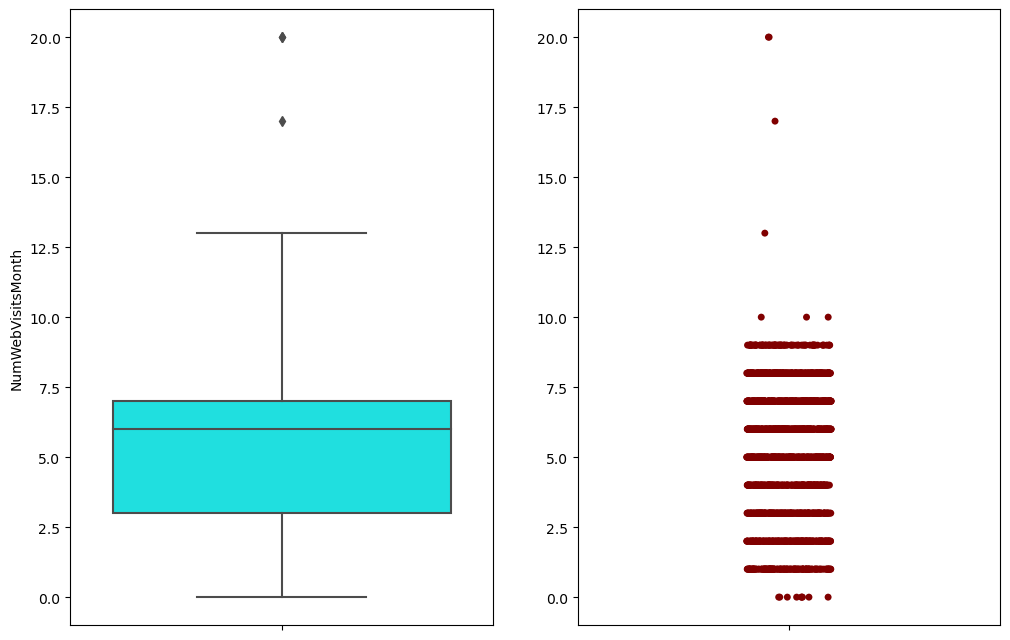

In [86]:
plot_num(place, 'NumWebVisitsMonth')

### Juntando Dados

In [87]:
df_lista = [people, products, promotion, place]

In [88]:
df_final = reduce(lambda df1, df2: pd.merge(df1, df2, on = "ID"), df_lista)

In [89]:
df_final.shape

(2203, 25)

In [90]:
df_final.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Childrenhome',
       'LifeTime', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'TotalAmountSpent', 'AcceptedCmp', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'TotalPurchases'],
      dtype='object')

In [91]:
df_final.drop(columns=["ID"], inplace = True)

### Normalização

In [92]:
def scaler(df):
    df2 = df.copy()
    for column in df2:
        minimo = df2 [column].min()
        maximo = df2 [column].max()
        df2[column] = (df[column] - minimo) / (maximo - minimo)
    return df2

In [93]:
scaled_df = scaler(df_final)

In [94]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516179,0.615070,0.309517,0.494858,0.103495,0.214707,0.647299,0.034498,0.316689,0.506590,...,0.103519,0.136811,0.238604,0.089877,0.330002,0.164580,0.505419,0.241032,0.265138,0.374255
std,0.208790,0.251205,0.132629,0.292626,0.304674,0.410712,0.477919,0.182547,0.249584,0.289392,...,0.157023,0.160487,0.239412,0.178555,0.120862,0.139301,0.148665,0.172198,0.117599,0.231731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.500000,0.205796,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.258941,...,0.003817,0.028037,0.024235,0.000000,0.250000,0.000000,0.400000,0.083333,0.150000,0.161290
50%,0.535714,0.500000,0.305883,0.494949,0.000000,0.000000,1.000000,0.000000,0.333333,0.509299,...,0.030534,0.077882,0.154946,0.000000,0.333333,0.150000,0.500000,0.200000,0.300000,0.354839
75%,0.660714,0.750000,0.412801,0.747475,0.000000,0.000000,1.000000,0.000000,0.333333,0.756795,...,0.127863,0.174455,0.413190,0.200000,0.400000,0.250000,0.600000,0.333333,0.350000,0.580645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Método Elbow

In [95]:
inertia = []
num_clusters = range(1, 14)

for k in num_clusters:
    Model = KMeans(n_clusters = k)
    Model.fit(scaled_df)
    inertia.append(Model.inertia_)    

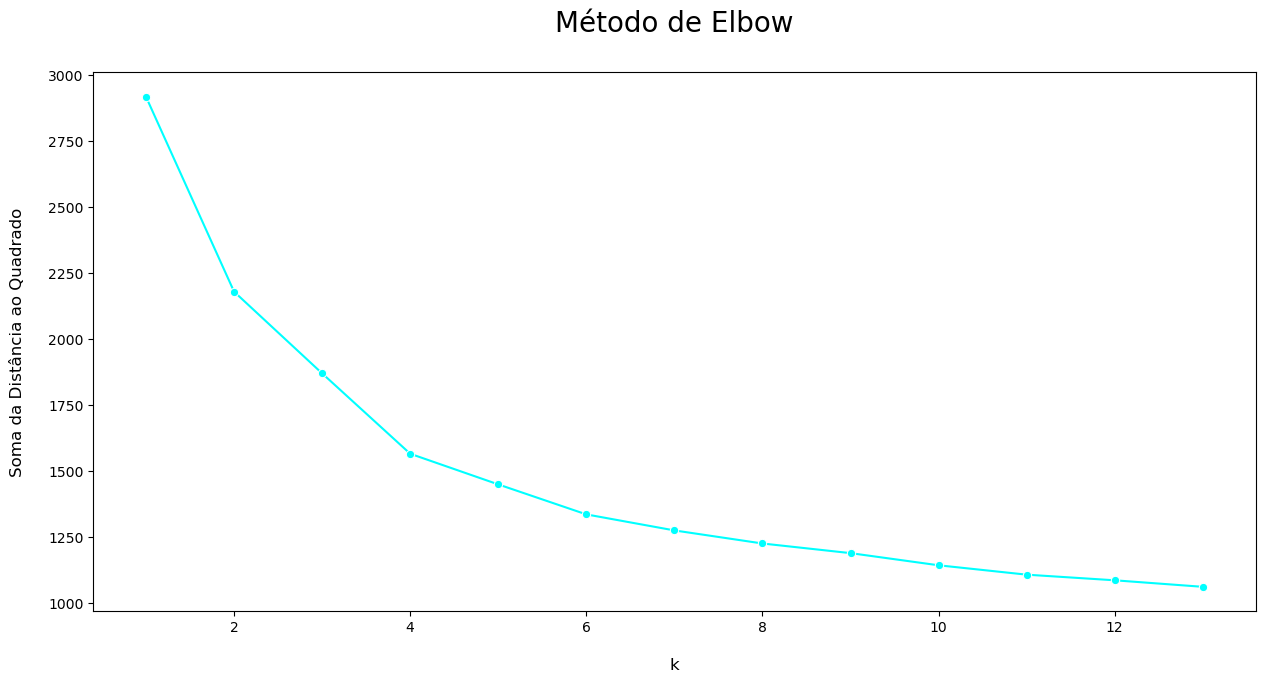

In [96]:
plt.figure(figsize = (15,7))
sns.lineplot(x=num_clusters, y=inertia, color="aqua", marker = "o")
plt.xlabel("\nk", size = 12)
plt.ylabel("Soma da Distância ao Quadrado\n", size = 12)
plt.title("Método de Elbow\n", size =20)
plt.show()

### Alocação de Pesos

In [97]:
scaled_df.columns

Index(['Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Childrenhome',
       'LifeTime', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'TotalAmountSpent', 'AcceptedCmp', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'TotalPurchases'],
      dtype='object')

In [98]:
scaled_df.TotalAmountSpent = 8 * scaled_df.TotalAmountSpent
scaled_df.TotalPurchases = 6 * scaled_df.TotalPurchases
scaled_df.Recency = 4 * scaled_df.Recency
scaled_df.NumWebVisitsMonth = 4 * scaled_df.NumWebVisitsMonth
scaled_df.Income = 4 * scaled_df.Income
scaled_df.LifeTime = 4 * scaled_df.LifeTime
scaled_df.Year_Birth = 2 * scaled_df.Year_Birth
scaled_df.Childrenhome = 2 * scaled_df.Childrenhome
scaled_df.Education = 2 * scaled_df.Education

In [99]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,1.032358,1.230141,1.238068,1.979431,0.103495,0.214707,0.647299,0.034498,0.633379,2.026362,...,0.103519,0.136811,1.908833,0.089877,0.330002,0.164580,0.505419,0.241032,1.060554,2.245530
std,0.417580,0.502410,0.530515,1.170504,0.304674,0.410712,0.477919,0.182547,0.499168,1.157569,...,0.157023,0.160487,1.915298,0.178555,0.120862,0.139301,0.148665,0.172198,0.470396,1.390384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.678571,1.000000,0.823182,0.969697,0.000000,0.000000,0.000000,0.000000,0.000000,1.035765,...,0.003817,0.028037,0.193882,0.000000,0.250000,0.000000,0.400000,0.083333,0.600000,0.967742
50%,1.071429,1.000000,1.223532,1.979798,0.000000,0.000000,1.000000,0.000000,0.666667,2.037196,...,0.030534,0.077882,1.239571,0.000000,0.333333,0.150000,0.500000,0.200000,1.200000,2.129032
75%,1.321429,1.500000,1.651204,2.989899,0.000000,0.000000,1.000000,0.000000,0.666667,3.027182,...,0.127863,0.174455,3.305522,0.200000,0.400000,0.250000,0.600000,0.333333,1.400000,3.483871
max,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000


### Kmeans

In [100]:
Model = KMeans(n_clusters = 4)

In [101]:
clusters = Model.fit_predict(scaled_df)

In [102]:
clusters

array([1, 0, 2, ..., 2, 2, 0], dtype=int32)

In [103]:
df_final["cluster"] = clusters

In [104]:
df_final

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime,...,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,cluster
0,1957,2,58138.0,58,0,1,0,0,0,25.333333,...,88,1617,1,0.363636,0.454545,0.181818,0.136364,7,22,1
1,1954,2,46344.0,38,0,1,0,0,2,7.000000,...,6,27,0,0.250000,0.250000,0.500000,0.500000,5,4,0
2,1965,2,71613.0,26,0,0,1,0,0,13.633333,...,42,776,0,0.400000,0.100000,0.500000,0.050000,4,20,2
3,1984,2,26646.0,26,0,0,1,0,1,7.866667,...,5,53,0,0.333333,0.000000,0.666667,0.333333,6,6,0
4,1981,4,58293.0,94,0,0,1,0,1,8.600000,...,15,422,0,0.357143,0.214286,0.428571,0.357143,5,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,1967,2,61223.0,46,0,0,1,0,1,15.933333,...,247,1341,0,0.562500,0.187500,0.250000,0.125000,5,16,1
2199,1946,4,64014.0,56,0,0,1,0,3,3.866667,...,8,444,1,0.533333,0.133333,0.333333,0.466667,7,15,2
2200,1981,2,56981.0,91,1,0,0,0,0,8.400000,...,24,1241,1,0.111111,0.166667,0.722222,0.055556,6,18,2
2201,1956,3,69245.0,8,0,0,1,0,1,8.433333,...,61,843,0,0.285714,0.238095,0.476190,0.095238,3,21,2


#### Salvando o modelo

In [105]:
filename = "modelo_finalizado.sav"
pickle.dump(Model, open(filename, "wb"))

#### Carregando o modelo

In [ ]:
Model = pickle.load(open(modelo_finalizado.sav, "rb"))

### Análise dos Clusters

In [106]:
df_final.cluster.value_counts()

2    635
3    584
0    577
1    407
Name: cluster, dtype: int64

In [107]:
df_final.groupby("cluster").mean()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
cluster,,,,,,,,,,,,,,,,,,,,,
0,1971.258232,2.412478,36677.318891,23.020797,0.097054,0.225303,0.648180,0.029463,1.225303,14.063951,...,5.487002,19.091854,131.005199,0.268631,0.347913,0.082835,0.569252,0.337191,6.365685,6.698440
1,1968.572482,2.582310,77312.405405,51.056511,0.103194,0.248157,0.614251,0.034398,0.297297,17.078542,...,67.533170,79.977887,1616.916462,1.255528,0.276209,0.309855,0.413936,0.082683,3.476658,20.363636
2,1965.903937,2.568504,63765.044094,48.226772,0.111811,0.182677,0.653543,0.051969,0.825197,15.186824,...,39.806299,66.138583,836.181102,0.398425,0.330756,0.215737,0.453507,0.159277,4.521260,18.417323
3,1970.078767,2.304795,36533.220890,74.041096,0.101027,0.215753,0.662671,0.020548,1.268836,14.412272,...,6.542808,19.148973,130.174658,0.121575,0.348975,0.088474,0.562551,0.345275,6.375000,6.702055


In [108]:
pd.set_option("display.max_columns", None)

In [109]:
df_final.groupby("cluster").mean()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Childrenhome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,1971.258232,2.412478,36677.318891,23.020797,0.097054,0.225303,0.648180,0.029463,1.225303,14.063951,64.287695,5.748700,27.772964,8.616984,5.487002,19.091854,131.005199,0.268631,0.347913,0.082835,0.569252,0.337191,6.365685,6.698440
1,1968.572482,2.582310,77312.405405,51.056511,0.103194,0.248157,0.614251,0.034398,0.297297,17.078542,805.385749,64.552826,505.823096,93.643735,67.533170,79.977887,1616.916462,1.255528,0.276209,0.309855,0.413936,0.082683,3.476658,20.363636
2,1965.903937,2.568504,63765.044094,48.226772,0.111811,0.182677,0.653543,0.051969,0.825197,15.186824,433.226772,39.058268,203.489764,54.461417,39.806299,66.138583,836.181102,0.398425,0.330756,0.215737,0.453507,0.159277,4.521260,18.417323
3,1970.078767,2.304795,36533.220890,74.041096,0.101027,0.215753,0.662671,0.020548,1.268836,14.412272,59.099315,6.261986,30.238014,8.883562,6.542808,19.148973,130.174658,0.121575,0.348975,0.088474,0.562551,0.345275,6.375000,6.702055


# Cluster 1:
    
É composto por indivíduos com uma renda relativamente alta e um nível educacional médio. A média de idade dos indivíduos é em torno de 54 anos, indicando que são pessoas maduras. Eles apresentam um tempo médio desde a última compra de cerca de 51 dias, sugerindo um envolvimento ativo em atividades de compra.

A maioria das pessoas neste cluster está casada ou em um relacionamento estável. É interessante notar que a maioria não possui filhos, o que pode ter um impacto nas suas decisões de compra, pois podem ter mais liberdade para investir em si mesmos.

Em relação aos gastos, observa-se um alto consumo de vinhos, carne, peixe e produtos de ouro. Isso sugere que esses indivíduos apreciam produtos de alta qualidade e estão dispostos a investir em itens que consideram luxuosos. O total gasto em compras é relativamente alto, indicando que eles têm um poder de compra considerável.

A taxa de aceitação de campanhas de marketing é alta, o que indica que estratégias de marketing direcionadas e personalizadas têm um bom impacto nesse grupo. Eles estão mais propensos a responder positivamente a ofertas e campanhas que correspondam às suas preferências e estilo de vida.


# Cluster 3:
    
Comparando com os outros clusters, o Cluster 3 é caracterizado por indivíduos com renda e nível educacional relativamente baixos. Eles apresentam um tempo médio maior desde a última compra, o que pode indicar um menor engajamento em atividades de compras online ou menos acesso a meios de compra. Além disso, a taxa de aceitação de campanhas de marketing é baixa, o que sugere que esses indivíduos podem ser menos responsivos às estratégias tradicionais de marketing.

Dado que eles têm filhos, é possível que suas prioridades financeiras estejam mais voltadas para a família, limitando assim seus gastos em outras áreas. No entanto, ainda há um consumo moderado de produtos como vinhos, carnes e produtos doces, o que indica algum interesse nessas categorias de produtos.

# Cluster 2:

É caracterizado por indivíduos com uma renda relativamente alta e um nível educacional médio. Eles apresentam um tempo médio razoavelmente curto desde a última compra, o que sugere um engajamento regular em atividades de compra.

É interessante notar que a maioria dos indivíduos neste cluster está casada ou em um relacionamento estável, o que pode influenciar suas preferências de consumo. Além disso, eles têm filhos, o que pode ser um fator que influencia suas decisões de compra.

Os gastos neste cluster indicam um consumo considerável de produtos como vinhos, frutas, carne e peixe. Isso sugere que esses indivíduos possuem uma preferência por alimentos saudáveis e de qualidade. O total gasto em compras é relativamente alto, indicando que eles estão dispostos a investir em produtos de sua preferência.

A taxa de aceitação de campanhas de marketing é moderada, o que sugere que estratégias de marketing segmentadas e personalizadas podem ter algum impacto nesse grupo.

# Cluster 0:
    
É composto por indivíduos com uma renda relativamente baixa e um nível educacional mais baixo. A média de idade dos indivíduos é em torno de 50 anos, indicando que são pessoas em uma faixa etária mais jovem ou de meia-idade.

A maioria das pessoas neste cluster é solteira, o que pode indicar um perfil mais independente e menos preocupado com responsabilidades familiares. No entanto, a maioria possui filhos, o que pode influenciar suas decisões de compra.

Em relação aos gastos, observa-se um consumo moderado de vinhos, frutas, carne e peixe. Isso sugere que esses indivíduos tendem a adquirir produtos de forma equilibrada e não exagerada. O total gasto em compras é relativamente baixo, indicando que eles têm um poder de compra mais limitado.

A taxa de aceitação de campanhas de marketing é baixa, o que indica que estratégias de marketing tradicionais podem não ser tão eficazes com esse grupo. Eles podem ser mais seletivos e céticos em relação a ofertas e campanhas publicitárias.

#### TotalAmount Spent

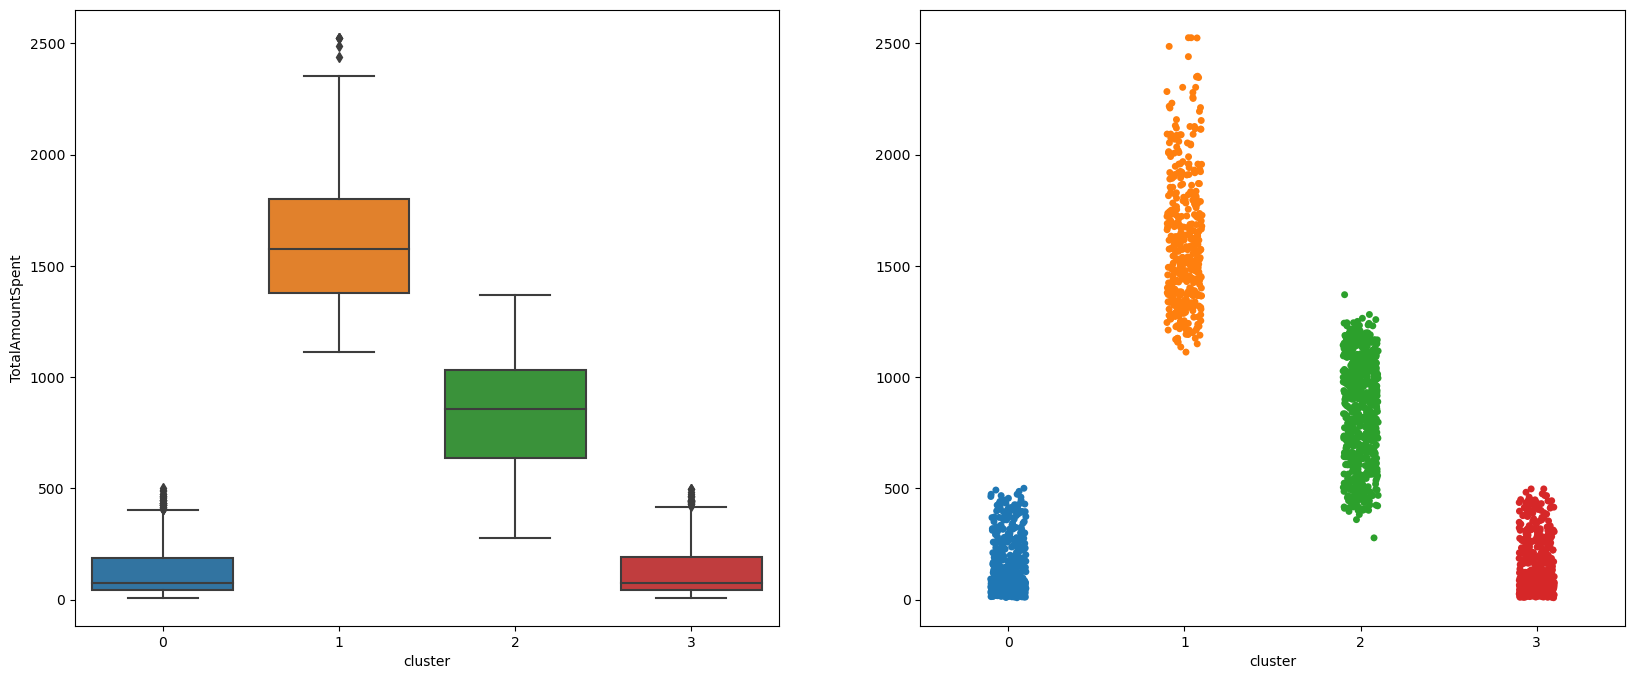

In [110]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='TotalAmountSpent', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('TotalAmountSpent')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='TotalAmountSpent', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

#### TotalPurchases

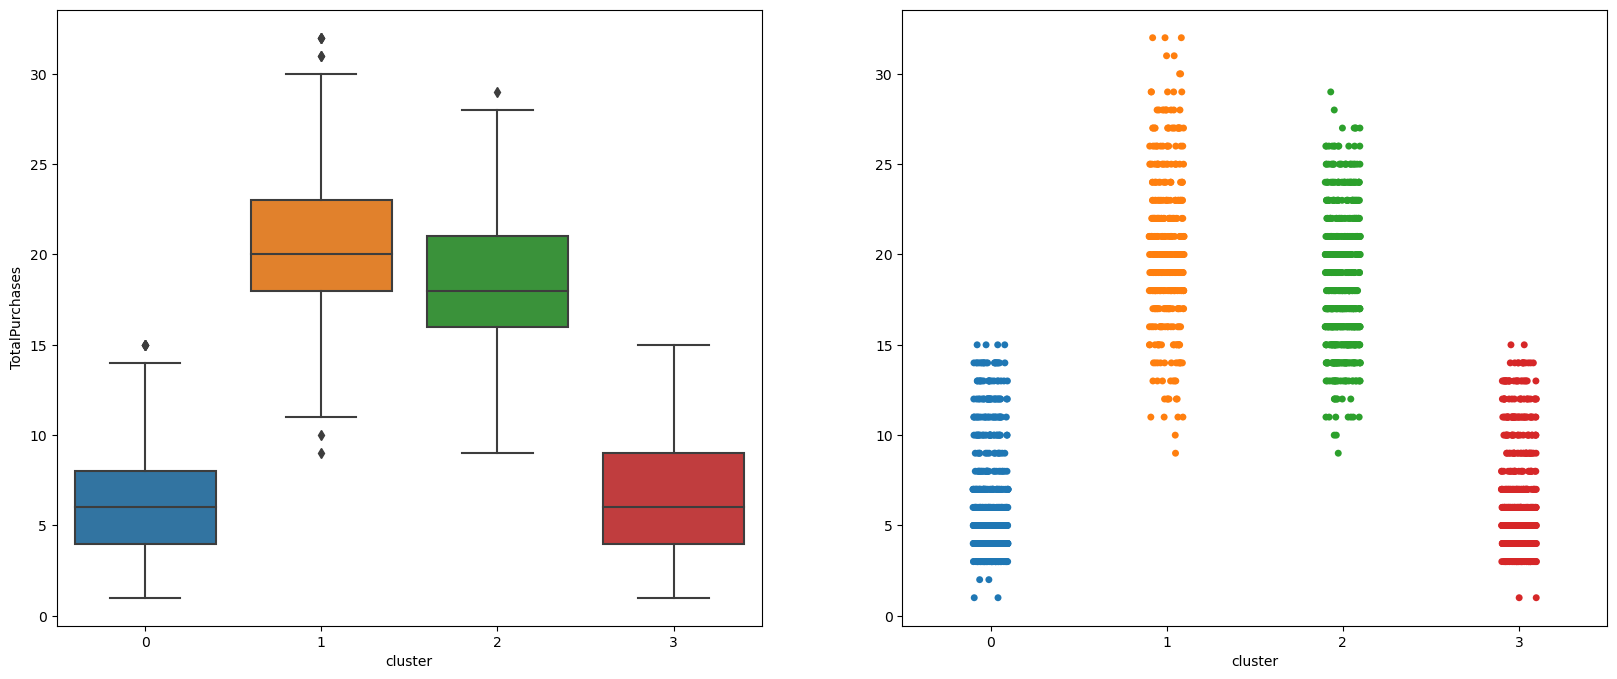

In [111]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='TotalPurchases', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('TotalPurchases')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='TotalPurchases', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

#### NumDealsPurchases

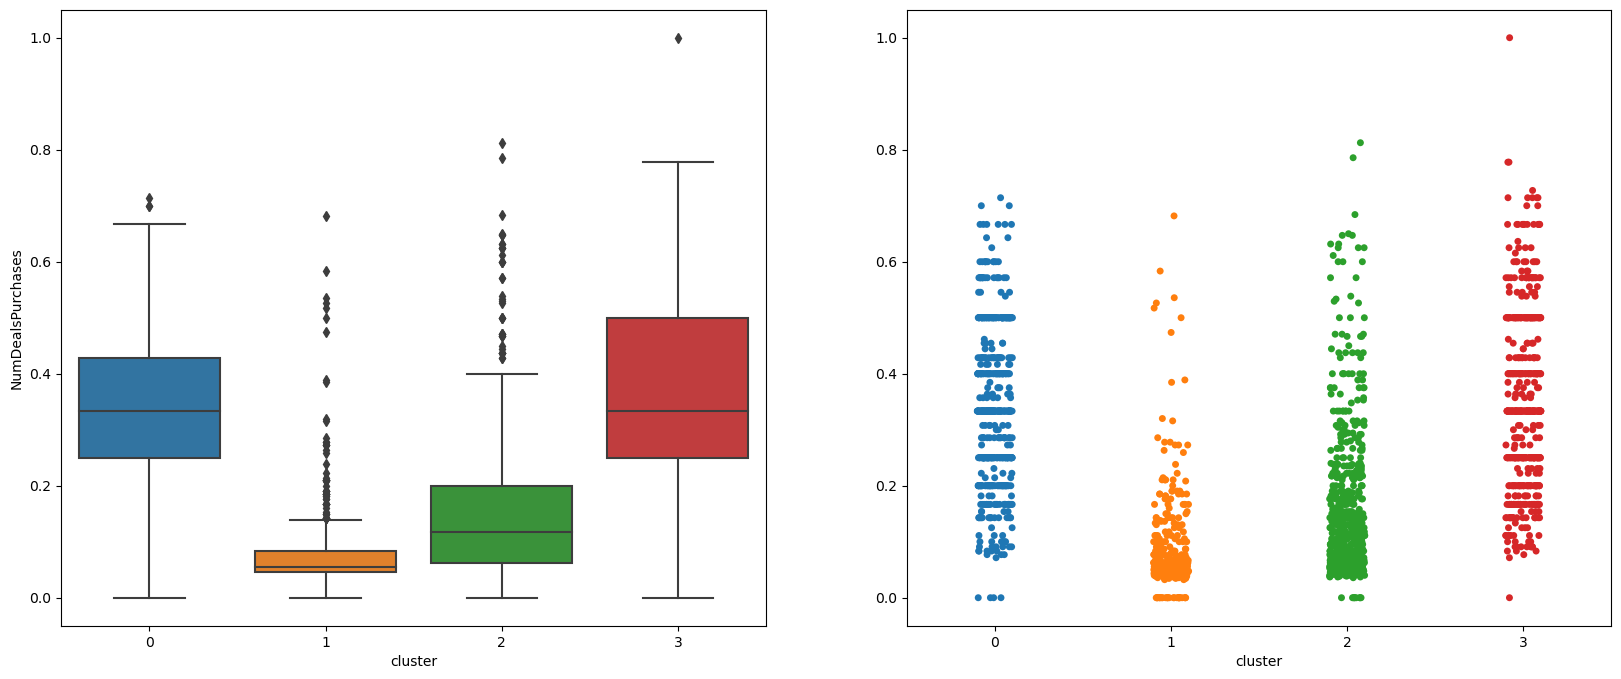

In [112]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='NumDealsPurchases', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('NumDealsPurchases')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='NumDealsPurchases', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

#### Income

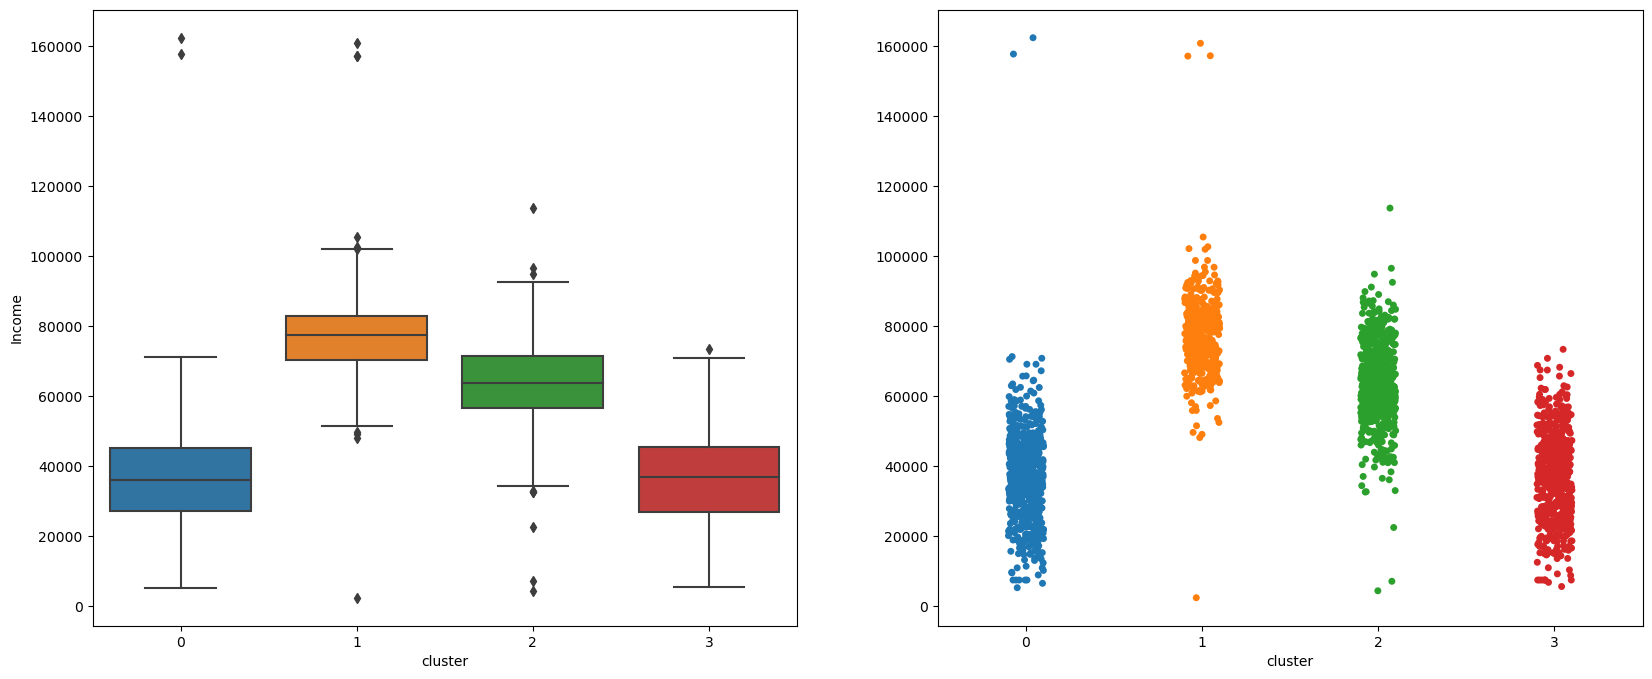

In [113]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='Income', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('Income')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='Income', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

#### Recency

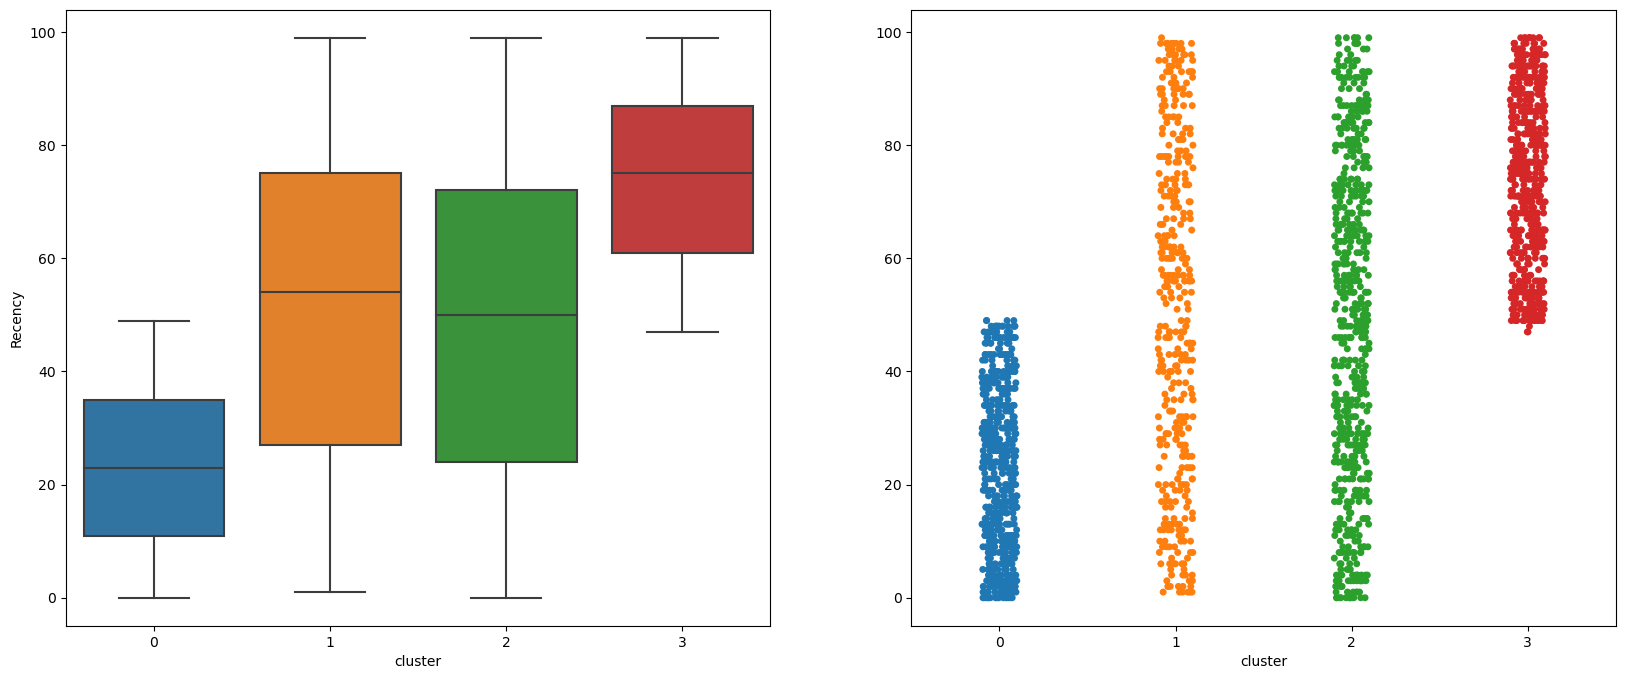

In [114]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='Recency', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('Recency')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='Recency', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

#### NumWebVisitsMonth

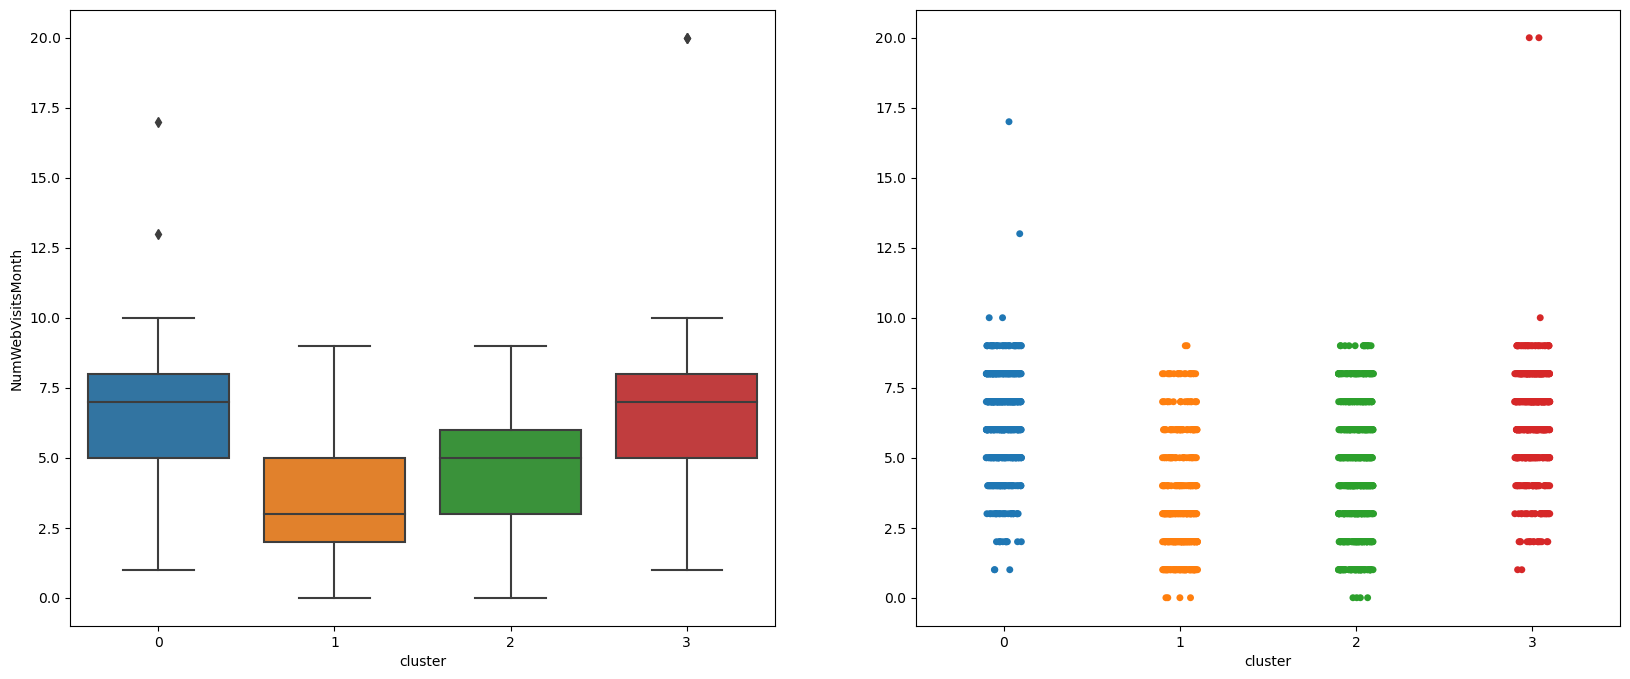

In [115]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot (x='cluster', y='NumWebVisitsMonth', data=df_final, ax=fig.add_subplot(gs [0,0]))
plt.ylabel('NumWebVisitsMonth')
plt.xlabel('cluster')
sns.stripplot(x='cluster', y='NumWebVisitsMonth', data=df_final, ax=fig.add_subplot(gs [0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()